# Spaceship Titanic Clasification

# 0. imports

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os
import pandas as pd
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

# Getting the dataset

In [2]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
test_df = pd.read_csv("data/test.csv")
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
sample_df = pd.read_csv("data/sample_submission.csv")
sample_df

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


# Visualising the dataset

In [5]:
print("Size of the training data set: ", len(df))

Size of the training data set:  8693


In [6]:
df['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [7]:
transported = df[df['Transported'] == True]
not_transported = df[df['Transported'] == False]

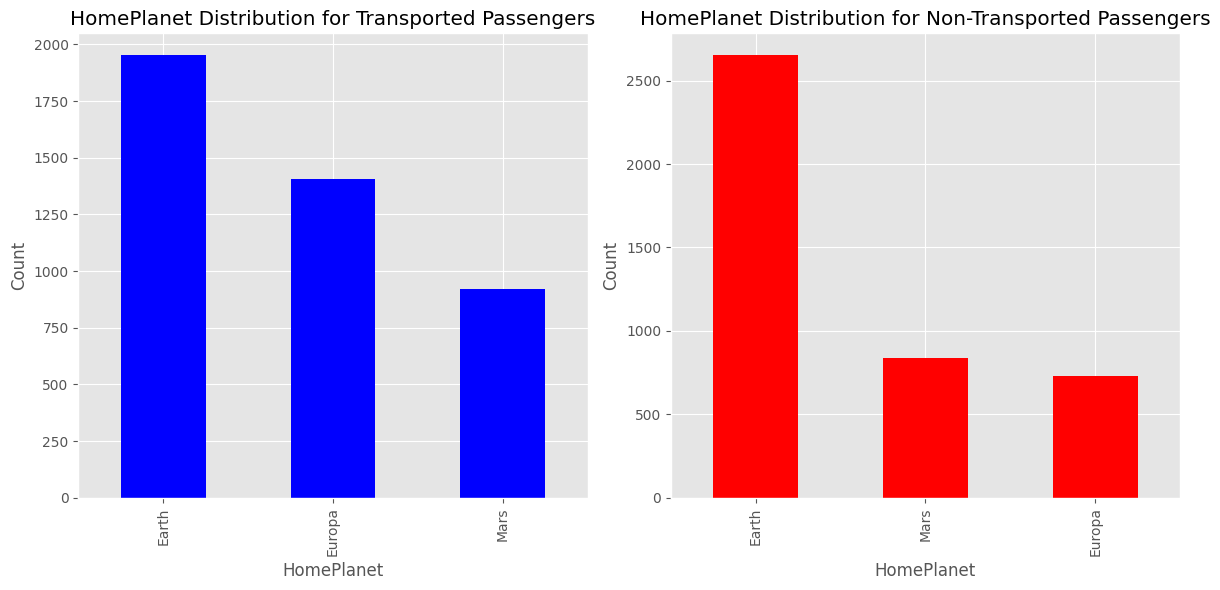

In [8]:
# Count the occurrences of each HomePlanet for transported passengers
transported_counts = transported['HomePlanet'].value_counts()

# Count the occurrences of each HomePlanet for non-transported passengers
not_transported_counts = not_transported['HomePlanet'].value_counts()

# Plot bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transported_counts.plot(kind='bar', color='blue')
plt.title('HomePlanet Distribution for Transported Passengers')
plt.xlabel('HomePlanet')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
not_transported_counts.plot(kind='bar', color='red')
plt.title('HomePlanet Distribution for Non-Transported Passengers')
plt.xlabel('HomePlanet')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

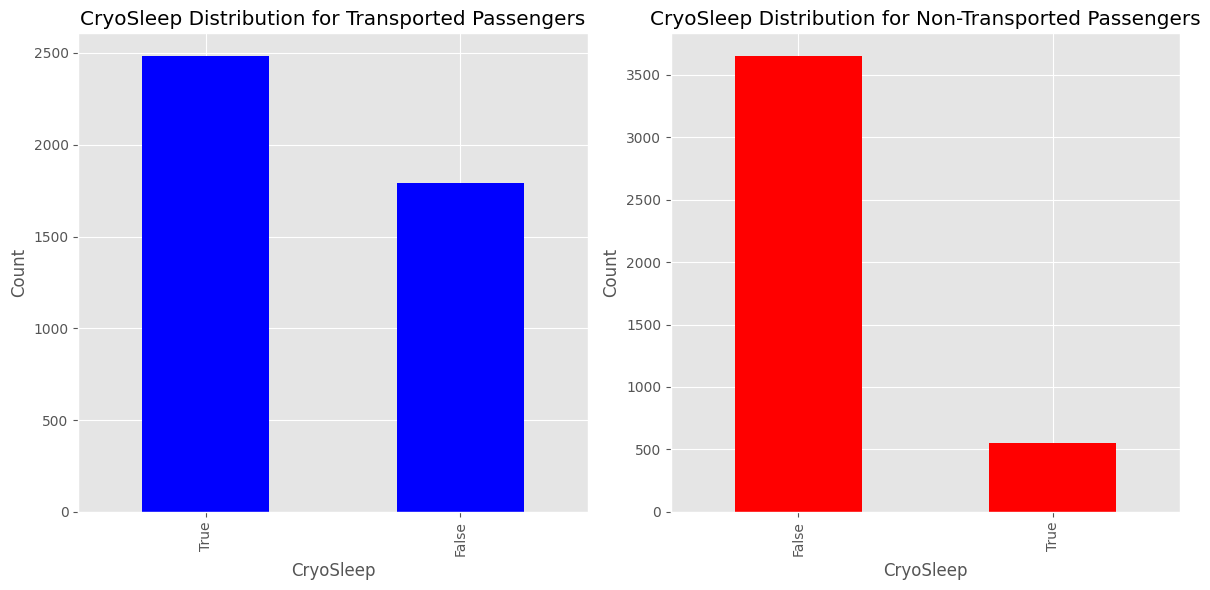

In [9]:
# Count the occurrences of CryoSleep for transported passengers
transported_cryo_counts = transported['CryoSleep'].value_counts()

# Count the occurrences of CryoSleep for non-transported passengers
not_transported_cryo_counts = not_transported['CryoSleep'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transported_cryo_counts.plot(kind='bar', color='blue')
plt.title('CryoSleep Distribution for Transported Passengers')
plt.xlabel('CryoSleep')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
not_transported_cryo_counts.plot(kind='bar', color='red')
plt.title('CryoSleep Distribution for Non-Transported Passengers')
plt.xlabel('CryoSleep')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

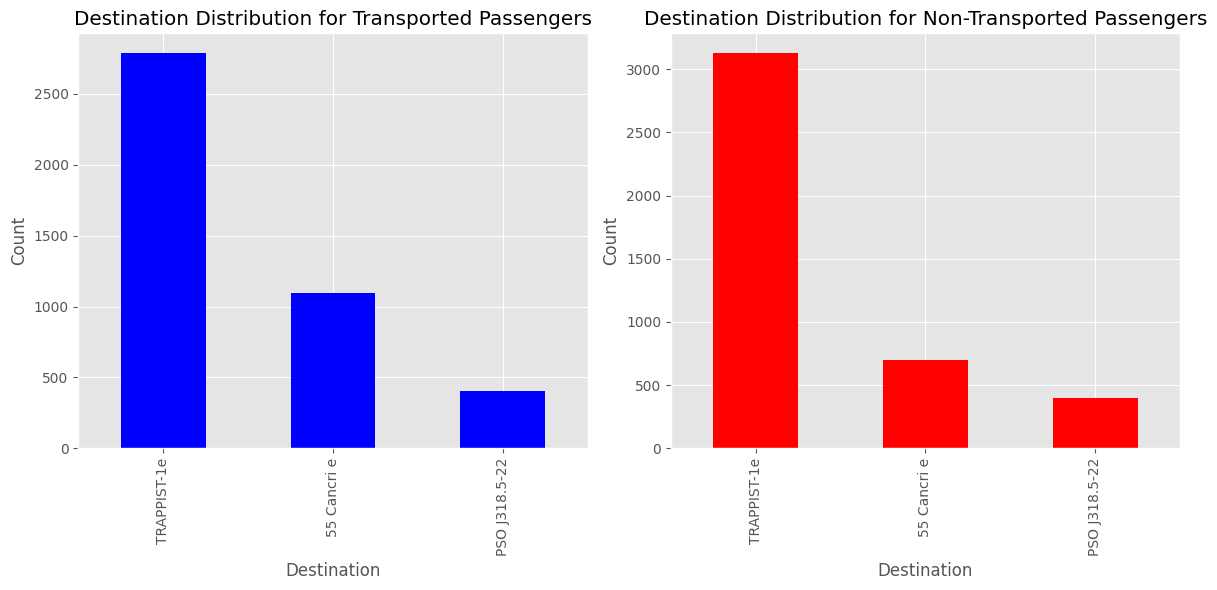

In [10]:
# Count the occurrences of Destination for transported passengers
transported_dest_counts = transported['Destination'].value_counts()

# Count the occurrences of Destination for non-transported passengers
not_transported_dest_counts = not_transported['Destination'].value_counts()

# Plot bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transported_dest_counts.plot(kind='bar', color='blue')
plt.title('Destination Distribution for Transported Passengers')
plt.xlabel('Destination')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
not_transported_dest_counts.plot(kind='bar', color='red')
plt.title('Destination Distribution for Non-Transported Passengers')
plt.xlabel('Destination')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

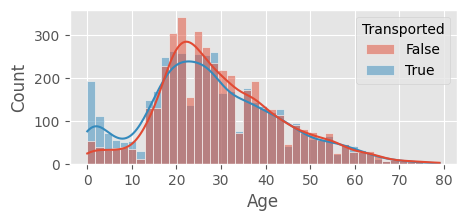

In [11]:
plt.figure(figsize=(5,2))
sns.histplot(x='Age', data=df, hue='Transported',kde=True)
plt.show()

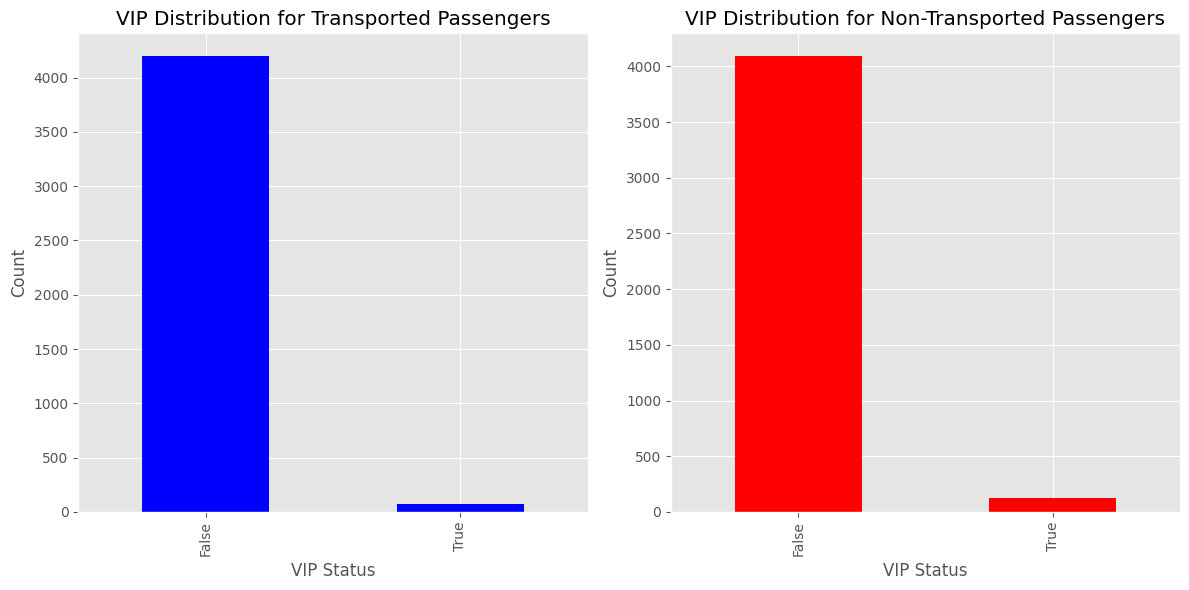

In [12]:
# Count the occurrences of VIP status for transported passengers
transported_vip_counts = transported['VIP'].value_counts()

# Count the occurrences of VIP status for non-transported passengers
not_transported_vip_counts = not_transported['VIP'].value_counts()

# Plot bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
transported_vip_counts.plot(kind='bar', color='blue')
plt.title('VIP Distribution for Transported Passengers')
plt.xlabel('VIP Status')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
not_transported_vip_counts.plot(kind='bar', color='red')
plt.title('VIP Distribution for Non-Transported Passengers')
plt.xlabel('VIP Status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Data Cleaning

In [13]:
df['Transported'].isna().sum()

0

In [14]:
data=pd.concat([df,test_df],axis=0,ignore_index=True)
data = pd.concat([data, data['Cabin'].str.split('/', expand=True)], axis=1)
data.rename(columns={0: 'Deck', 1: 'Num', 2: 'Side'}, inplace=True)
data.drop(columns=['PassengerId','Name','Cabin','Num'],inplace=True)
data.isna().sum()/data.shape[0]

HomePlanet      0.022205
CryoSleep       0.023901
Destination     0.021126
Age             0.020817
VIP             0.022822
RoomService     0.020278
FoodCourt       0.022282
ShoppingMall    0.023593
Spa             0.021897
VRDeck          0.020663
Transported     0.329761
Deck            0.023053
Side            0.023053
dtype: float64

In [15]:
data

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,G,S
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,NaN,NaN
12967,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,NaN,D,P
12968,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,D,P


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Destination   12696 non-null  object 
 3   Age           12700 non-null  float64
 4   VIP           12674 non-null  object 
 5   RoomService   12707 non-null  float64
 6   FoodCourt     12681 non-null  float64
 7   ShoppingMall  12664 non-null  float64
 8   Spa           12686 non-null  float64
 9   VRDeck        12702 non-null  float64
 10  Transported   8693 non-null   object 
 11  Deck          12671 non-null  object 
 12  Side          12671 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


In [17]:
for col in data.columns:
    if data[col].dtype==object:
        print(col,'\b:')
        print(data[col].value_counts(dropna=False))

HomePlanet:
HomePlanet
Earth     6865
Europa    3133
Mars      2684
NaN        288
Name: count, dtype: int64
CryoSleep:
CryoSleep
False    8079
True     4581
NaN       310
Name: count, dtype: int64
Destination:
Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
NaN               274
Name: count, dtype: int64
VIP:
VIP
False    12401
NaN        296
True       273
Name: count, dtype: int64
Transported:
Transported
True     4378
False    4315
NaN      4277
Name: count, dtype: int64
Deck:
Deck
F      4239
G      3781
E      1323
B      1141
C      1102
D       720
A       354
NaN     299
T        11
Name: count, dtype: int64
Side:
Side
S      6381
P      6290
NaN     299
Name: count, dtype: int64


In [18]:
data['HomePlanet'].fillna('Earth', inplace=True)
data['CryoSleep'].fillna(False, inplace=True)
data['Destination'].fillna('TRAPPIST-1e', inplace=True)
data['VIP'].fillna(False, inplace=True)
data['Deck'].fillna('F', inplace=True)

for col in data.columns:
    if data[col].dtype != object:
        data[col].fillna(data[col].median(), inplace=True)

# Check for remaining missing values
missing_values = data.isna().sum()[data.isna().sum() > 0]
print(missing_values)

Transported    4277
Side            299
dtype: int64


# Create New Feature

In [19]:
data.Age.describe()

count    12970.000000
mean        28.735081
std         14.238958
min          0.000000
25%         20.000000
50%         27.000000
75%         37.000000
max         79.000000
Name: Age, dtype: float64

In [20]:
data.insert(loc=4, column='Age_category', value=0)

# Use loc to avoid SettingWithCopyWarning
data.loc[data.Age <= 20, 'Age_category'] = 1
data.loc[(data.Age > 20) & (data.Age <= 27), 'Age_category'] = 2
data.loc[(data.Age > 27) & (data.Age <= 37), 'Age_category'] = 3
data.loc[data.Age > 37, 'Age_category'] = 4

data

,HomePlanet,CryoSleep,Destination,Age,Age_category,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,4,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,2,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,4,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,3,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,1,False,303.0,70.0,151.0,565.0,2.0,True,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,Earth,True,TRAPPIST-1e,34.0,3,False,0.0,0.0,0.0,0.0,0.0,NaN,G,S
12966,Earth,False,TRAPPIST-1e,42.0,4,False,0.0,847.0,17.0,10.0,144.0,NaN,F,NaN
12967,Mars,True,55 Cancri e,27.0,2,False,0.0,0.0,0.0,0.0,0.0,NaN,D,P
12968,Europa,False,TRAPPIST-1e,27.0,2,False,0.0,2680.0,0.0,0.0,523.0,NaN,D,P


In [21]:
data.Age_category.astype(object)
data.Age_category.dtype

dtype('int64')

# Standadizing

In [22]:
for col in data.columns:
    if data[col].dtype=='float64':
        print(col,'\b:',data[col].var())

Age: 202.74791719986092
RoomService: 411863.8565454137
FoodCourt: 2458743.4090403705
ShoppingMall: 341235.4634393278
Spa: 1251594.3696245237
VRDeck: 1365756.0028085478


In [23]:
data1=data.copy()
for col in data1.columns:
    if data1[col].dtype=='float64':
        data1[col]=(data1[col]-data1[col].mean())/data1[col].std()
        print(data1[col].var())

0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0
1.0000000000000002
0.9999999999999999


# OneHot Encoding

In [34]:
data1.columns

AttributeError: 'DataFrame' object has no attribute 'colums'

In [31]:
data1['Transported'].astype(int)
data1=pd.get_dummies(data1)
data1.head()

KeyError: 'Transported'

# Data Split

In [25]:
train1=data1.iloc[:df.shape[0],:]
test1=data1.iloc[df.shape[0]:,:]
train1.shape,test1.shape

((8693, 14), (4277, 14))

# Duplicated Values

In [26]:
train1.duplicated().sum()

1923

In [27]:
train1 = train1.copy()  # Create a copy of the DataFrame

train1.drop_duplicates(inplace=True)
train1.duplicated().sum()

0

# Outliers

In [28]:
clf = LocalOutlierFactor(contamination = 0.02)
outliers = clf.fit_predict(train1)
train2 = train1[np.where(outliers == 1, True, False)]
train2.head()

ValueError: could not convert string to float: 'Europa'

In [ ]:
# Lista de columnas que se deben convertir a 0 y 1
binary_columns = ['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 
                   'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 
                   'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 
                   'Side_P', 'Side_S']

# Copiar el DataFrame para evitar SettingWithCopyWarning
train2 = train2.copy()

# Convertir las columnas a enteros (0 o 1)
train2[binary_columns] = train2[binary_columns].astype(int)

# Model Development

## Split Data

In [ ]:
train2=pd.concat([train2,train2],axis=0,ignore_index=True)
x=train2.drop(columns='Transported')
pred=test1.drop(columns='Transported')
y=train2['Transported']
x.shape,y.shape,pred.shape

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.30)
x_train.shape,y_train.shape,x_test.shape,y_test.shape,pred.shape

# Modeling

In [ ]:
for i in range(x_train.shape[1]):
    if np.issubdtype(x_train[:, i].dtype, np.bool_):
        x_train[:, i] = x_train[:, i].astype(int)
        x_test[:, i] = x_test[:, i].astype(int)


In [ ]:
x_train=np.array(x_train,dtype='float32')
x_test=np.array(x_test,dtype='float32')

In [ ]:
x_train

In [ ]:
from keras import models
from keras import layers
from keras import regularizers

regularizers.l1_l2(l1=0.1, l2=0.1) 

model=models.Sequential()

model.add(layers.Dense(40,activation='relu',input_shape=(28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
print(x_train.shape)

In [ ]:
history=model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=128,
    verbose=0,
    validation_data=(x_test,y_test)
)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)
plt.subplot(1,2,1)
plt.plot(epochs,loss_values,'r',label='Training Loss')
plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
plt.title('Traning and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Traning and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()